In [27]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
files = glob.glob('data-to-use/*.csv')

Load in all data

In [89]:
df_feb = df_march = df_jan =  pd.DataFrame(columns= pd.read_csv(files[0]).columns)
for f in files:
    df = pd.read_csv(f)
    df_jan = df_jan.append(df[(df.years == 2020) & (df.months == 1)],ignore_index= True)
    df_feb = df_feb.append(df[(df.years == 2020) & (df.months == 2)],ignore_index= True)
    df_march = df_march.append(df[(df.years == 2020) & (df.months == 3)],ignore_index= True)
    

Function to plot graphs side by side. Might not be the optimal way of going about structuring this but it works for the time being

In [1]:
def graph_side_by_side(label,month1,month2,month3):
    fig, axes = plt.subplots(1, 3, sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20, 6))
    
    axes[0].set_title('January')
    axes[1].set_title('February')
    axes[2].set_title('March')
    
    axes[0].set_ylabel('Queries Per Day')
    
    month1.reset_index(name=label).plot(y=label,ax=axes[0])
    month2.reset_index(name=label).plot(y=label,ax=axes[1])
    month3.reset_index(name=label).plot(y=label,ax=axes[2])



### Graph of Total number of queries per day across all users by month


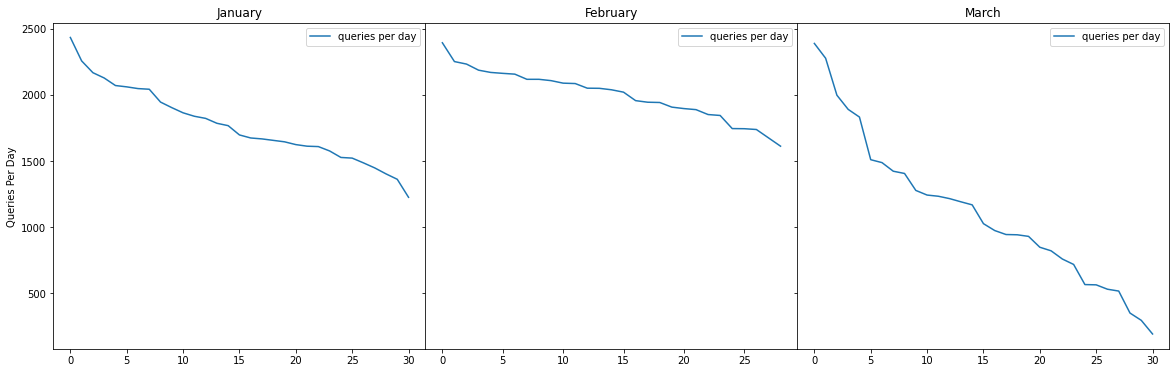

In [98]:
df_jan_qpd = df_jan.days.value_counts()
df_feb_qpd = df_feb.days.value_counts()
df_marh_qpd = df_march.days.value_counts()

graph_side_by_side('queries per day',df_jan_qpd,df_feb_qpd,df_marh_qpd)

### Graph of mean video length per day across all users by month


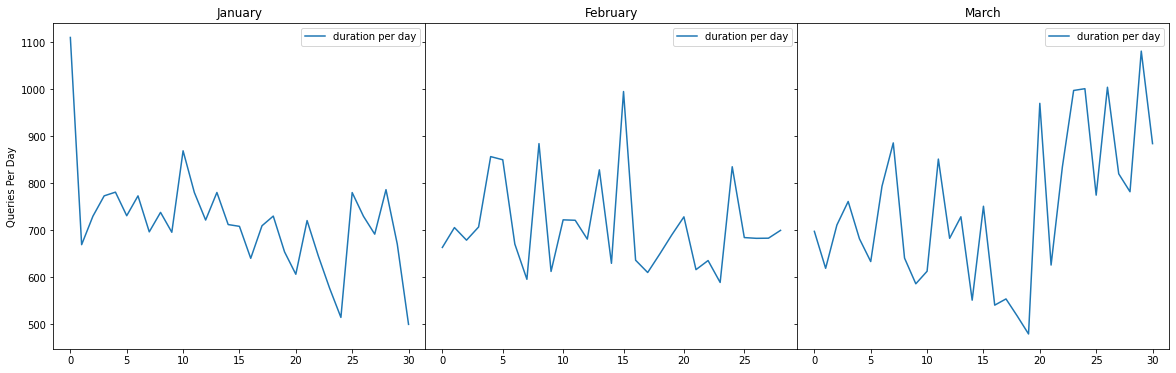

In [101]:
df_jan_duration_means = df_jan.groupby('days').durations.mean()
df_feb_duration_means = df_feb.groupby('days').durations.mean()
df_marh_duration_means = df_march.groupby('days').durations.mean()

graph_side_by_side('duration per day',df_jan_duration_means,df_feb_duration_means,df_marh_duration_means)